<h1><center> TP1 - Benchetrit-Laborde - Analyse de données complexes </center></h1>

**Introduction**

<h2><center> Import libraries </center></h2>

In [386]:
import pandas as pd
import numpy as np
import seaborn as sns

In [387]:
# import data
conso = pd.read_csv("cdc_data_conso.csv", sep=';', decimal=',')

In [388]:
# format datetime in conso dataframe
conso.Horodate = pd.to_datetime(conso.Horodate, format='%d/%m/%Y %H:%M')
conso.head()

,Id_IRVE,Horodate,Charge_kw
0,15145260,2019-09-01 00:10:00,0.48
1,15145260,2019-09-01 00:20:00,0.13
2,15145260,2019-09-01 00:30:00,0.96
3,15145260,2019-09-01 00:40:00,0.20
4,15145260,2019-09-01 00:50:00,0.74


<h2><center> Question 1 </center></h2>

### Power

In [389]:
bins = [-0.5, 2, 12, 31, 60, 105, 186, 256, 352, 516]
conso['Charge_bin'] = pd.cut(conso.Charge_kw, bins)
conso.head()

,Id_IRVE,Horodate,Charge_kw,Charge_bin
0,15145260,2019-09-01 00:10:00,0.48,"(-0.5, 2.0]"
1,15145260,2019-09-01 00:20:00,0.13,"(-0.5, 2.0]"
2,15145260,2019-09-01 00:30:00,0.96,"(-0.5, 2.0]"
3,15145260,2019-09-01 00:40:00,0.20,"(-0.5, 2.0]"
4,15145260,2019-09-01 00:50:00,0.74,"(-0.5, 2.0]"


In [390]:
intervals = list(pd.cut(conso.Charge_kw, bins).values.unique())

binnames = ['<2', '2to12', '12to31', '31to60', '60to105',
            '105to186', '186to256', '256to352', '352to516',
            '>516']

for (interval, binname) in zip(intervals, binnames):
    conso.Charge_bin.replace({interval: binname}, inplace=True)
    
conso.head()

,Id_IRVE,Horodate,Charge_kw,Charge_bin
0,15145260,2019-09-01 00:10:00,0.48,<2
1,15145260,2019-09-01 00:20:00,0.13,<2
2,15145260,2019-09-01 00:30:00,0.96,<2
3,15145260,2019-09-01 00:40:00,0.20,<2
4,15145260,2019-09-01 00:50:00,0.74,<2


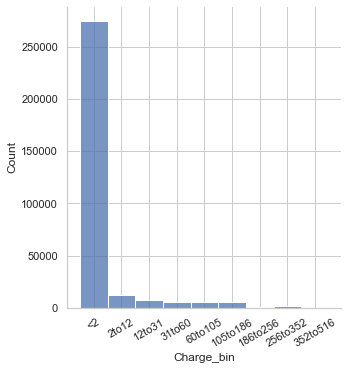

In [391]:
g = sns.displot(data=conso, x="Charge_bin")
g.set_xticklabels(rotation=30)

### Power supply per hour

In [392]:
#add usefull columns
conso['Hour'] = conso.Horodate.dt.hour
conso['Weekday'] = conso.Horodate.dt.day_name()
conso.head()

,Id_IRVE,Horodate,Charge_kw,Charge_bin,Hour,Weekday
0,15145260,2019-09-01 00:10:00,0.48,<2,0,Sunday
1,15145260,2019-09-01 00:20:00,0.13,<2,0,Sunday
2,15145260,2019-09-01 00:30:00,0.96,<2,0,Sunday
3,15145260,2019-09-01 00:40:00,0.20,<2,0,Sunday
4,15145260,2019-09-01 00:50:00,0.74,<2,0,Sunday


In [393]:
conso_per_hour = conso.groupby('Hour').mean()
conso_per_hour.drop(['Id_IRVE'], axis=1, inplace=True)
conso_per_hour.reset_index(inplace=True)
conso_per_hour.head()

,Hour,Charge_kw
0,0,2.435643
1,1,1.899655
2,2,1.175062
3,3,0.932299
4,4,1.015316


In [394]:
bins = np.linspace(0, 24, 9)
binranges = ['00-03hr', '03-06hr', '06-09hr',
            '09-12hr', '12-15hr', '15-18hr',
            '18-21hr', '21-24hr']
digitized = np.digitize(conso_per_hour.Hour, bins)
conso_per_hour['Hour_range'] = digitized
for (i, binrange) in enumerate(binranges):
    conso_per_hour.Hour_range.replace({i+1: binrange}, inplace=True)
conso_per_hour

,Hour,Charge_kw,Hour_range
0,0,2.435643,00-03hr
1,1,1.899655,00-03hr
2,2,1.175062,00-03hr
3,3,0.932299,03-06hr
4,4,1.015316,03-06hr
5,5,1.331142,03-06hr
6,6,1.805627,06-09hr
7,7,3.050649,06-09hr
8,8,4.043680,06-09hr
9,9,6.400183,09-12hr


<AxesSubplot:xlabel='Hour_range', ylabel='Charge_kw'>

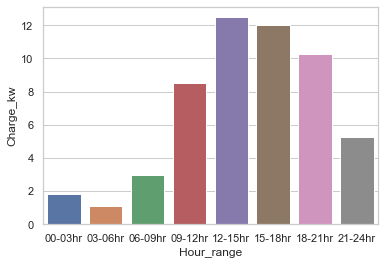

In [395]:
sns.set_theme(style="whitegrid")
sns.barplot(data=conso_per_hour, x='Hour_range', y='Charge_kw', ci=None)

### Power supply per day

In [396]:
conso_per_day = conso.groupby('Weekday').mean()
conso_per_day.drop(['Id_IRVE', 'Hour'], axis=1, inplace=True)
conso_per_day.reset_index(inplace=True)

new_index = [1, 5, 6, 4, 0, 2, 3]
conso_per_day = conso_per_day.reindex(new_index).reset_index(drop=True)

conso_per_day

,Weekday,Charge_kw
0,Monday,8.221156
1,Tuesday,6.505087
2,Wednesday,5.296453
3,Thursday,5.479408
4,Friday,6.346277
5,Saturday,7.758000
6,Sunday,7.506851


<AxesSubplot:xlabel='Weekday', ylabel='Charge_kw'>

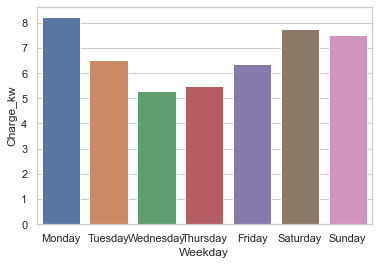

In [397]:
sns.set_theme(style="whitegrid")
sns.barplot(data=conso_per_day, x='Weekday', y='Charge_kw', ci=None)

<h2><center> Question 2 </center></h2>

In [398]:
conso.head()

,Id_IRVE,Horodate,Charge_kw,Charge_bin,Hour,Weekday
0,15145260,2019-09-01 00:10:00,0.48,<2,0,Sunday
1,15145260,2019-09-01 00:20:00,0.13,<2,0,Sunday
2,15145260,2019-09-01 00:30:00,0.96,<2,0,Sunday
3,15145260,2019-09-01 00:40:00,0.20,<2,0,Sunday
4,15145260,2019-09-01 00:50:00,0.74,<2,0,Sunday
